# Tweeter Gender Classifier using Support Vector Machine
<br>dataset : https://www.kaggle.com/datasets/crowdflower/twitter-user-gender-classification

In [ ]:
import pandas as pd
from sklearn import svm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [ ]:
data = pd.read_csv('data/twitter_gender_clean.csv')
data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,retweet_count,sidebar_color,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,text,description
0,0,0,0,3,101,male,1.0000,1,1.0,4986,...,0,560,146,110964,1,0,7044,48,12244,11465
1,1,0,0,3,107,male,1.0000,1,1.0,1347,...,0,366,146,7471,1,0,7123,55,4736,678
2,2,0,0,3,110,male,0.6625,1,1.0,3705,...,1,366,146,5617,1,0,6612,28,24,7618
3,3,0,0,3,87,male,1.0000,1,1.0,11907,...,0,366,146,1693,1,0,4425,118,8670,8475
4,4,0,0,3,212,female,1.0000,1,1.0,8932,...,0,0,146,31462,1,0,7123,156,16094,10844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20019,20045,1,1,259,283,female,1.0000,1,1.0,16810,...,0,366,146,783,4,0,5973,156,4857,0
20020,20046,1,1,248,283,male,1.0000,1,1.0,15602,...,0,0,146,13523,1,0,3011,156,6051,13797
20021,20047,1,1,264,283,male,1.0000,1,1.0,18292,...,0,366,146,26419,4,0,3156,156,9670,12530
20022,20048,1,1,250,283,female,0.8489,1,1.0,3920,...,0,0,146,56073,1,0,5538,156,10412,422


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20024 entries, 0 to 20023
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20024 non-null  int64  
 1   _golden                20024 non-null  int64  
 2   _unit_state            20024 non-null  int64  
 3   _trusted_judgments     20024 non-null  int64  
 4   _last_judgment_at      20024 non-null  int64  
 5   gender                 20024 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20024 non-null  int64  
 8   profile_yn:confidence  20024 non-null  float64
 9   created                20024 non-null  int64  
 10  fav_number             20024 non-null  int64  
 11  gender_gold            20024 non-null  int64  
 12  link_color             20024 non-null  int64  
 13  name                   20024 non-null  int64  
 14  profile_yn_gold        20024 non-null  int64  
 15  pr

Proses Labelisasi pada Gender

Text(0.5, 1.0, 'Jumlah Gender dalam Data')

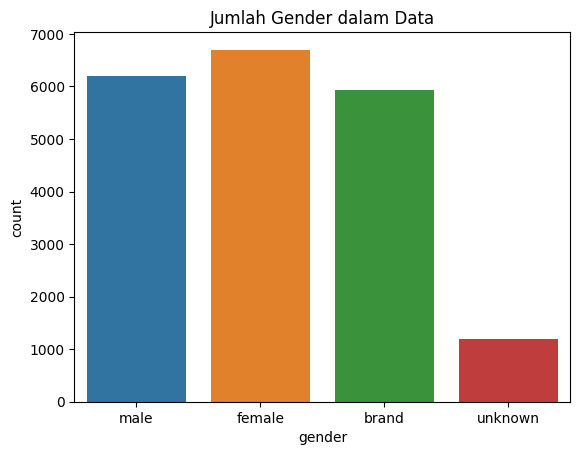

In [ ]:
sns.countplot(x='gender',data=data)
plt.title('Jumlah Gender dalam Data')

In [ ]:
data['gender'].unique()

array(['male', 'female', 'brand', 'unknown'], dtype=object)

In [ ]:
data.gender = data.gender.replace({'unknown':0, '':0, " ":0, 'female': 1, 'male': 2, 'brand':3})
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,retweet_count,sidebar_color,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,text,description
0,0,0,0,3,101,2,1.0000,1,1.0,4986,...,0,560,146,110964,1,0,7044,48,12244,11465
1,1,0,0,3,107,2,1.0000,1,1.0,1347,...,0,366,146,7471,1,0,7123,55,4736,678
2,2,0,0,3,110,2,0.6625,1,1.0,3705,...,1,366,146,5617,1,0,6612,28,24,7618
3,3,0,0,3,87,2,1.0000,1,1.0,11907,...,0,366,146,1693,1,0,4425,118,8670,8475
4,4,0,0,3,212,1,1.0000,1,1.0,8932,...,0,0,146,31462,1,0,7123,156,16094,10844


In [ ]:
plot1 = data[data.gender == 1]
plot2 = data[data.gender == 2]

Text(0.5, 1.0, 'Persebaran Gender dalam Data')

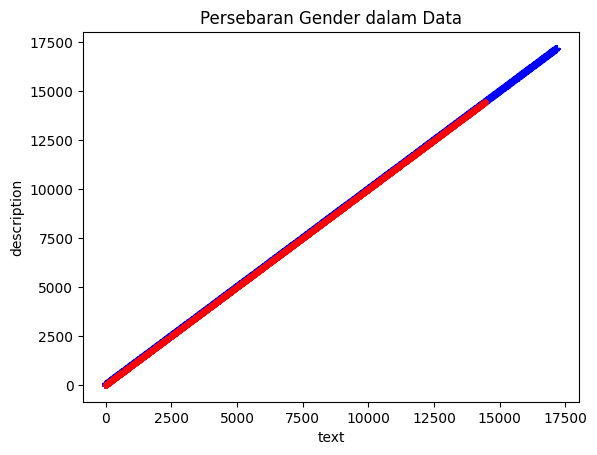

In [ ]:
plt.xlabel('text')
plt.ylabel('description')
plt.scatter(plot1['text'], plot1['text'], color='blue', marker='+')
plt.scatter(plot2['description'], plot2['description'], color='red', marker='.')
plt.title('Persebaran Gender dalam Data')

In [ ]:
data.describe()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,retweet_count,sidebar_color,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,text,description
count,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.0,20024.000000,20024.000000,...,20024.000000,20024.000000,20024.000000,2.002400e+04,20024.000000,20024.0,20024.000000,20024.000000,20024.000000,20024.000000
mean,10025.977078,0.002497,0.002497,3.616510,141.353726,1.843488,0.882756,1.0,0.993212,9338.568718,...,0.079505,322.958600,145.412455,3.894227e+04,2.082052,0.0,5075.882191,104.843887,9034.523322,5730.488763
std,5787.963013,0.049909,0.049909,12.339874,71.535406,0.918806,0.191403,0.0,0.047198,5402.970184,...,2.651469,189.028526,7.570879,1.169009e+05,1.360361,0.0,2304.629060,50.265282,5161.971186,4757.695340
min,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.0,0.627200,0.000000,...,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,5014.750000,0.000000,0.000000,3.000000,84.000000,1.000000,0.677800,1.0,1.000000,4643.750000,...,0.000000,248.000000,146.000000,2.397500e+03,1.000000,0.0,3267.750000,55.000000,4447.750000,700.000000
50%,10026.500000,0.000000,0.000000,3.000000,137.000000,2.000000,1.000000,1.0,1.000000,9312.500000,...,0.000000,366.000000,146.000000,1.145100e+04,1.000000,0.0,5886.000000,118.000000,9106.500000,5314.500000
75%,15037.250000,0.000000,0.000000,3.000000,207.000000,3.000000,1.000000,1.0,1.000000,14039.250000,...,0.000000,397.000000,146.000000,4.003225e+04,3.000000,0.0,7123.000000,156.000000,13807.250000,9953.250000
max,20049.000000,1.000000,1.000000,274.000000,283.000000,3.000000,1.000000,1.0,1.000000,18698.000000,...,330.000000,560.000000,146.000000,2.680199e+06,4.000000,0.0,7863.000000,156.000000,17168.000000,14462.000000


# Algoritma SVM
Split data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
x = data.drop(columns=['gender'], axis=1)
scaler = StandardScaler()
x = scaler.fit_transform(x)

y = data['gender']

Split data

In [ ]:
_txrain, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.1, random_state = 0)

In [ ]:
y_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)

Menyimpan dan memisahkan file data training dan data test

Data training (90% atau 18.045 data)

In [ ]:
train_data = pd.DataFrame(x_train)
train_data.columns = ['_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at', 'gender:confidence', 'profile_yn', 'profile_yn:confidence', 'created', 'fav_number', 'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage', 'retweet_count', 'sidebar_color', 'tweet_coord', 'tweet_count', 'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone', 'text', 'description']
train_data['gender'] = y_train
train_data['gender'].fillna(0, inplace=True)
train_data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender:confidence,profile_yn,profile_yn:confidence,created,fav_number,...,sidebar_color,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,text,description,gender
0,0.557036,-0.050033,-0.050033,-0.049962,-0.480246,0.612567,0.0,0.143819,0.163698,-0.324099,...,1.254029,0.077608,0.403914,1.409917,0.0,0.300324,-1.767544,-1.076461,-1.104236,2.0
1,1.392411,-0.050033,-0.050033,-0.049962,0.959637,0.612567,0.0,0.143819,-0.657908,-0.189095,...,0.227704,0.077608,-0.101039,0.674800,0.0,0.489513,0.361215,-0.039428,1.477540,2.0
2,-0.625275,-0.050033,-0.050033,-0.049962,1.365040,0.612567,0.0,0.143819,0.655476,-0.302863,...,0.788480,0.077608,0.120710,-0.795435,0.0,1.081814,0.261740,0.377864,-0.856001,2.0
3,-0.840900,-0.050033,-0.050033,-0.049962,0.134850,-1.101136,0.0,0.143819,1.404157,-0.347891,...,-1.708560,0.077608,-0.157002,-0.795435,0.0,0.435273,1.017748,-1.427111,0.352177,2.0
4,-1.168312,-0.050033,-0.050033,-0.049962,1.001575,-1.143456,0.0,0.143819,-1.239084,-0.348290,...,-0.587009,0.077608,-0.231615,-0.795435,0.0,0.398390,-0.991641,-1.316879,-1.204497,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18016,-0.053384,-0.050033,-0.050033,-0.049962,-1.095341,0.612567,0.0,0.143819,-1.613147,-0.350126,...,0.391704,0.077608,-0.262385,-1.530553,0.0,-0.466847,1.017748,0.287393,0.313082,2.0
18017,-1.277852,-0.050033,-0.050033,-0.049962,-0.787794,0.612567,0.0,0.143819,0.352117,-0.341025,...,0.227704,0.077608,-0.184137,-0.795435,0.0,-1.653185,0.261740,0.696743,1.317585,3.0
18018,0.467365,-0.050033,-0.050033,-0.049962,-0.396369,0.612567,0.0,0.143819,0.804472,-0.350126,...,-1.708560,0.077608,-0.176832,1.409917,0.0,-1.243564,0.261740,-0.728717,1.374547,3.0
18019,0.304091,-0.050033,-0.050033,-0.049962,0.777904,0.612567,0.0,0.143819,-0.336780,-0.308930,...,1.254029,0.077608,-0.286286,1.409917,0.0,0.199654,-1.150801,-0.226377,-1.077542,1.0


In [ ]:
train_data.to_csv('data/training_data.csv', index=False)

Data testing (10% atau 2.005 data)

In [ ]:
test_data = pd.DataFrame(x_test)
test_data.columns = ['_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at', 'gender:confidence', 'profile_yn', 'profile_yn:confidence', 'created', 'fav_number', 'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage', 'retweet_count', 'sidebar_color', 'tweet_coord', 'tweet_count', 'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone', 'text', 'description']
test_data['gender'] = y_test
test_data['gender'].fillna(0, inplace=True)
test_data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender:confidence,profile_yn,profile_yn:confidence,created,fav_number,...,sidebar_color,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,text,description,gender
0,-1.529761,-0.050033,-0.050033,-0.049962,1.490855,0.612567,0.0,0.143819,1.269598,0.572788,...,-0.544686,0.077608,1.676648,-0.795435,0.0,-0.522823,-1.150801,-1.408320,0.978967,0.0
1,0.672451,-0.050033,-0.050033,-0.049962,0.050973,0.612567,0.0,0.143819,-1.582238,-0.319708,...,-0.544686,0.077608,-0.246072,0.674800,0.0,0.888286,-1.031431,-0.873239,0.984642,0.0
2,-0.147893,-0.050033,-0.050033,-0.049962,0.959637,0.612567,0.0,0.143819,-0.769701,-0.259112,...,0.227704,0.077608,-0.301684,-1.530553,0.0,0.888286,1.017748,0.301729,-1.204497,0.0
3,-0.031787,-0.050033,-0.050033,-0.049962,1.420958,0.612567,0.0,0.143819,-0.659944,1.130368,...,1.254029,0.077608,-0.004416,-1.530553,0.0,-0.020777,0.261740,0.449738,1.208496,0.0
4,-0.401529,-0.050033,-0.050033,-0.049962,-0.997485,-0.948575,0.0,0.143819,-0.237943,-0.350126,...,0.227704,0.077608,0.569195,-0.795435,0.0,0.888286,1.017748,1.376345,-1.204497,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,-0.425372,-0.050033,-0.050033,-0.049962,0.484336,0.612567,0.0,0.143819,-0.104495,-0.349328,...,0.227704,0.077608,-0.319649,-0.795435,0.0,-1.859297,1.017748,1.260108,-0.018389,2.0
1999,-0.532839,-0.050033,-0.050033,-0.049962,1.085451,0.612567,0.0,0.143819,0.414862,-0.280029,...,0.788480,0.077608,-0.260974,-0.795435,0.0,0.888286,-0.673322,0.392394,-0.870294,0.0
2000,-0.957870,-0.050033,-0.050033,-0.049962,-0.186678,-1.069265,0.0,0.143819,1.063596,-0.288811,...,-1.708560,0.077608,-0.327485,-0.795435,0.0,-0.384836,1.017748,1.431752,1.335451,0.0
2001,-1.221182,-0.050033,-0.050033,-0.049962,1.420958,0.612567,0.0,0.143819,-0.311979,0.461735,...,0.793770,0.077608,-0.148884,-0.795435,0.0,0.888286,0.361215,0.336988,0.346292,0.0


In [ ]:
test_data.to_csv('data/test_data.csv', index=False)

# Algoritma SVM

Proses Training

In [ ]:
from sklearn.svm import SVC

classifier_lin = SVC(kernel = "linear", C=1)
classifier_lin = classifier_lin.fit(x_train, y_train)

classifier_poly = SVC(kernel = "poly", degree=3)
classifier_poly = classifier_poly.fit(x_train, y_train)

In [ ]:
print('Nilai akurasi kernel Linear\t: {0:0.4f}'.format(classifier_lin.score(x_test, y_test)*100), "%")
print('Nilai akurasi kernel Polynomial\t: {0:0.4f}'.format(classifier_poly.score(x_test, y_test)*100), "%")

Nilai akurasi kernel Linear	: 51.8223 %
Nilai akurasi kernel Polynomial	: 51.4728 %


In [ ]:
clasifier_poly = classifier_poly.predict(x_test)
classifier = classifier_lin

Proses Testing

In [ ]:
y_pred = classifier.predict(x_test)
yi = classifier_poly.predict(x_test)

prediction = pd.DataFrame(x_test)
prediction.columns = ['_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at', 'gender:confidence', 'profile_yn', 'profile_yn:confidence', 'created', 'fav_number', 'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage', 'retweet_count', 'sidebar_color', 'tweet_coord', 'tweet_count', 'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone', 'text', 'description']
prediction['gender'] = y_pred

prediction

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender:confidence,profile_yn,profile_yn:confidence,created,fav_number,...,sidebar_color,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,text,description,gender
0,-1.529761,-0.050033,-0.050033,-0.049962,1.490855,0.612567,0.0,0.143819,1.269598,0.572788,...,-0.544686,0.077608,1.676648,-0.795435,0.0,-0.522823,-1.150801,-1.408320,0.978967,3
1,0.672451,-0.050033,-0.050033,-0.049962,0.050973,0.612567,0.0,0.143819,-1.582238,-0.319708,...,-0.544686,0.077608,-0.246072,0.674800,0.0,0.888286,-1.031431,-0.873239,0.984642,3
2,-0.147893,-0.050033,-0.050033,-0.049962,0.959637,0.612567,0.0,0.143819,-0.769701,-0.259112,...,0.227704,0.077608,-0.301684,-1.530553,0.0,0.888286,1.017748,0.301729,-1.204497,1
3,-0.031787,-0.050033,-0.050033,-0.049962,1.420958,0.612567,0.0,0.143819,-0.659944,1.130368,...,1.254029,0.077608,-0.004416,-1.530553,0.0,-0.020777,0.261740,0.449738,1.208496,1
4,-0.401529,-0.050033,-0.050033,-0.049962,-0.997485,-0.948575,0.0,0.143819,-0.237943,-0.350126,...,0.227704,0.077608,0.569195,-0.795435,0.0,0.888286,1.017748,1.376345,-1.204497,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,-0.425372,-0.050033,-0.050033,-0.049962,0.484336,0.612567,0.0,0.143819,-0.104495,-0.349328,...,0.227704,0.077608,-0.319649,-0.795435,0.0,-1.859297,1.017748,1.260108,-0.018389,2
1999,-0.532839,-0.050033,-0.050033,-0.049962,1.085451,0.612567,0.0,0.143819,0.414862,-0.280029,...,0.788480,0.077608,-0.260974,-0.795435,0.0,0.888286,-0.673322,0.392394,-0.870294,1
2000,-0.957870,-0.050033,-0.050033,-0.049962,-0.186678,-1.069265,0.0,0.143819,1.063596,-0.288811,...,-1.708560,0.077608,-0.327485,-0.795435,0.0,-0.384836,1.017748,1.431752,1.335451,3
2001,-1.221182,-0.050033,-0.050033,-0.049962,1.420958,0.612567,0.0,0.143819,-0.311979,0.461735,...,0.793770,0.077608,-0.148884,-0.795435,0.0,0.888286,0.361215,0.336988,0.346292,1


Nilai Akurasi

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Hasil akurasi Kernel Linear\t:')
print(classification_report(y_test, y_pred))

Hasil akurasi	:
              precision    recall  f1-score   support

           0       0.38      0.08      0.14       119
           1       0.54      0.66      0.59       670
           2       0.47      0.32      0.38       620
           3       0.53      0.65      0.59       594

    accuracy                           0.52      2003
   macro avg       0.48      0.43      0.42      2003
weighted avg       0.51      0.52      0.50      2003



In [ ]:
print('Hasil akurasi Kernel Poly\t:')
print(classification_report(y_test, yi))

In [ ]:
from sklearn.metrics import confusion_matrix
print('Nilai Confussion Matrix \t:')
cm_lin = confusion_matrix(y_test, y_pred)
cm_poly = confusion_matrix(y_test, yi)
print('\nKernel Linear: \n',cm_lin)
print('\nKernel Poly: \n', cm_poly)

Nilai Confussion Matrix 	:

Kernel Linear: 
 [[ 10  31  16  62]
 [  4 441 113 112]
 [  4 247 199 170]
 [  8 104  94 388]]

Kernel Poly: 
 [[ 19  27  28  45]
 [  8 422 163  77]
 [ 19 235 265 101]
 [ 15 101 153 325]]


# Visualisasi Data

Tabel Confussion Matrix

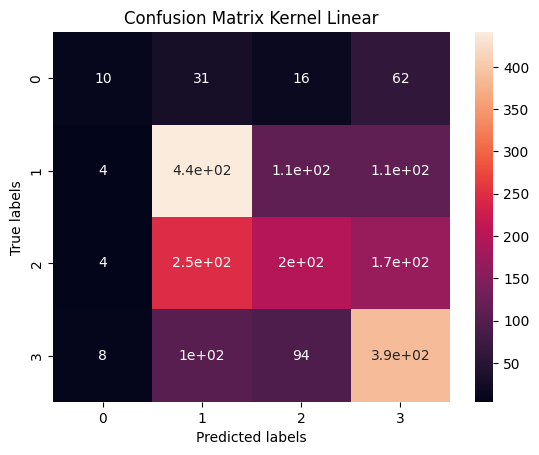

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

ax= plt.subplot()
cm = cm_lin

sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Kernel Linear');

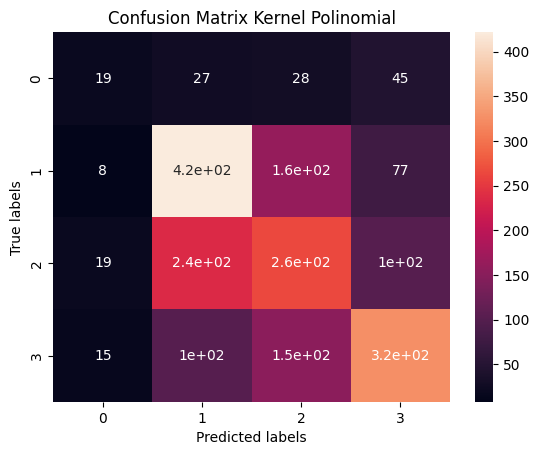

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

ax= plt.subplot()
cm = cm_poly

sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Kernel Polinomial');

Keterangan	:
0: unknown
1: female
2: male
3: brand


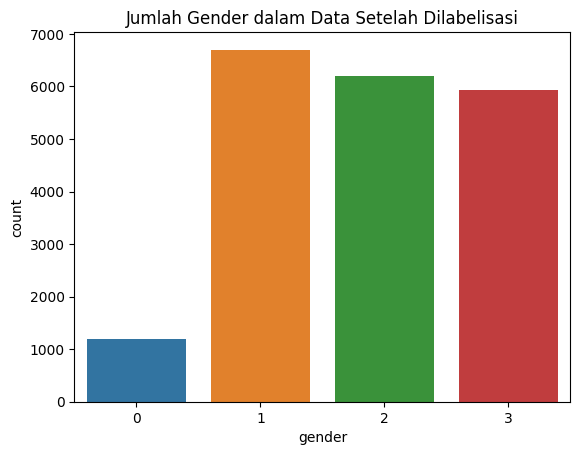

In [ ]:
sns.countplot(x='gender',data=data)
plt.title('Jumlah Gender dalam Data Setelah Dilabelisasi')
print('Keterangan\t:')
print('0: unknown')
print('1: female')
print('2: male')
print('3: brand')

Keterangan	:
0: unknown
1: female
2: male
3: brand


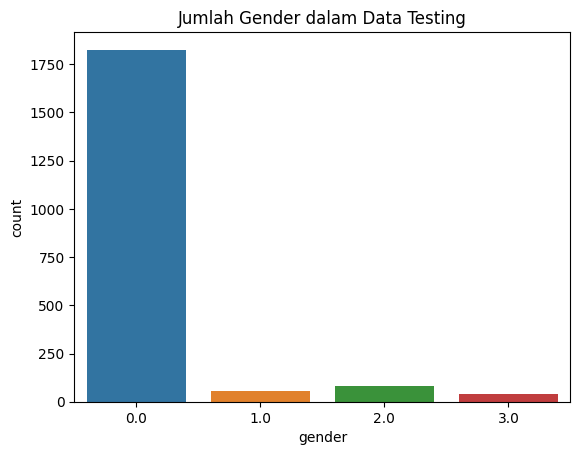

In [ ]:
sns.countplot(x='gender',data=test_data)
plt.title('Jumlah Gender dalam Data Testing')
print('Keterangan\t:')
print('0: unknown')
print('1: female')
print('2: male')
print('3: brand')

Keterangan	:
0: unknown
1: female
2: male
3: brand


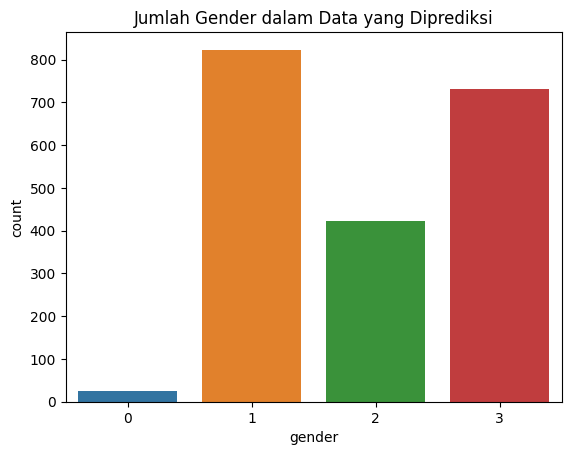

In [ ]:
sns.countplot(x='gender',data=prediction)
plt.title('Jumlah Gender dalam Data yang Diprediksi')
print('Keterangan\t:')
print('0: unknown')
print('1: female')
print('2: male')
print('3: brand')

Text(0.5, 1.0, 'Persebaran Gender dalam Data Prediction')

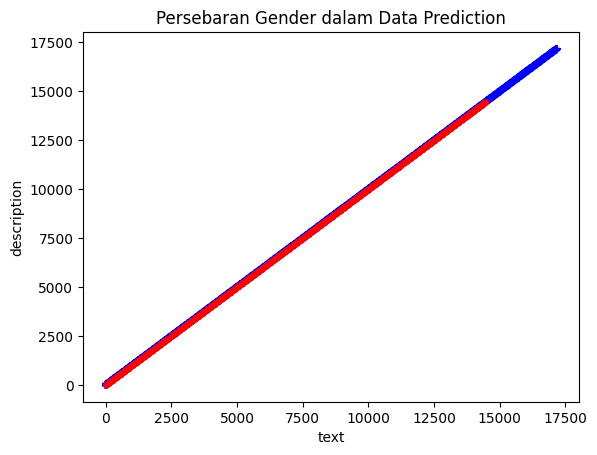

In [ ]:
titik1 = prediction[prediction.gender == 1]
titik2 = prediction[prediction.gender == 2]

plt.xlabel('text')
plt.ylabel('description')
plt.scatter(plot1['text'], plot1['text'], color='blue', marker='+')
plt.scatter(plot2['description'], plot2['description'], color='red', marker='.')
plt.title('Persebaran Gender dalam Data Prediction')

yang bawah ini jangan dulu di ss

In [ ]:
y = pd.DataFrame()
y['gender'] = data['gender'].head(20)
y

,gender
0,2
1,2
2,2
3,2
4,1
5,1
6,3
7,2
8,1
9,1


In [ ]:
x = pd.DataFrame()
x = data[['created', 'tweet_count']].head(20)
x

,created,tweet_count
0,4986,110964
1,1347,7471
2,3705,5617
3,11907,1693
4,8932,31462
5,6829,20036
6,9459,13354
7,4848,112117
8,18612,482
9,10511,26085


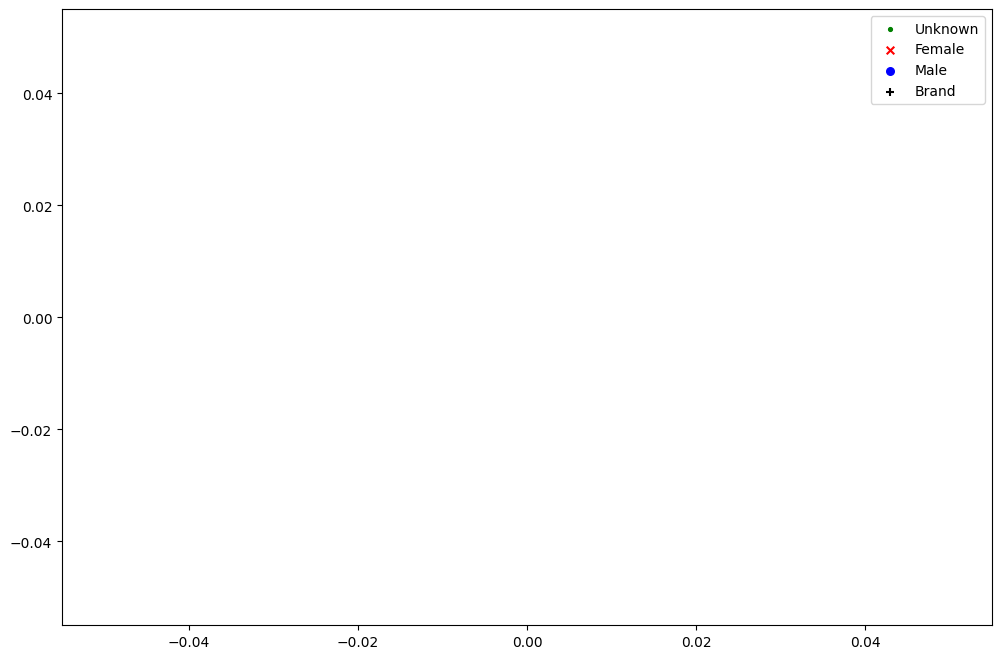

In [ ]:

data = pd.DataFrame(test_data[['text', 'description']], columns=[['X1', 'X2']])
data['y'] = test_data['gender']

unknown = data[data['y'].isin([0])]
female = data[data['y'].isin([1])]
male = data[data['y'].isin([2])]
brand = data[data['y'].isin([3])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(unknown['X1'], unknown['X2'], s=30, marker='.', color='green', label='Unknown')
ax.scatter(female['X1'], female['X2'], s=30, marker='x', color='red', label='Female')
ax.scatter(male['X1'], male['X2'], s=30, marker='o', color='blue', label='Male')
ax.scatter(brand['X1'], brand['X2'], s=30, marker='+', color='black', label='Brand')
ax.legend()